## methylprep v1.6.3: Comparing noob_meth / noob_unmeth with sesame and minfi

In [1]:
import methylprep
import pandas as pd
from pathlib import Path

In [2]:
PATH = '../example_data/'
meth = pd.read_csv(Path(PATH,'GSE69852/9247377085/9247377085/9247377085_R04C02_processed.csv')).set_index('IlmnID')[['beta_value']]
meth = meth.rename(columns={'beta_value':'9247377085_R04C02'})
ses = pd.read_csv(Path(PATH,'GSE69852/sesame_betas.csv')).set_index('Unnamed: 0')[['9247377085_R04C02']]
ses.index.name = 'IlmnID'
minfi = pd.read_csv(Path(PATH,'minfi/minfi_noob_betas.csv')).set_index('Unnamed: 0')[['9247377085_R04C02']]
minfi.index.name = 'IlmnID'
minfi = minfi.sort_index()
meth162 = pd.read_csv(Path(PATH,'GSE69852/test_v162/9247377085/9247377085_R04C02_processed.csv')).set_index('IlmnID')[['beta_value']]
meth162 = meth162.rename(columns={'beta_value':'9247377085_R04C02'})

9247377085_R04C02    0.002368
dtype: float64 9247377085_R04C02   -0.360834
dtype: float64 9247377085_R04C02    0.669671
dtype: float64
9247377085_R04C02    0.002976
dtype: float64 9247377085_R04C02   -0.360834
dtype: float64 9247377085_R04C02    0.668671
dtype: float64


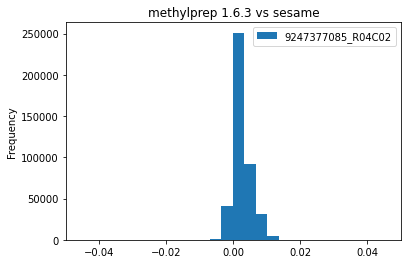

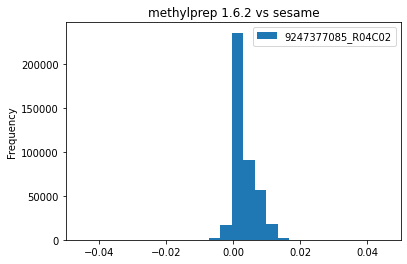

In [3]:
(meth-ses).plot.hist(bins=300, xlim=(-0.05, 0.05), title="methylprep 1.6.3 vs sesame")
(meth162-ses).plot.hist(bins=300, xlim=(-0.05, 0.05), title="methylprep 1.6.2 vs sesame")
print((meth-ses).mean(), (meth-ses).min(), (meth-ses).max())
print((meth162-ses).mean(), (meth162-ses).min(), (meth162-ses).max())

In [4]:
import numpy as np
_filter = (meth - ses) > 0.3
meth[_filter].dropna()

,9247377085_R04C02
IlmnID,
cg02525705,0.784
cg04571941,0.503
cg05140257,0.437
cg05901765,0.802
cg06260815,0.394
cg08857906,0.577
cg08941173,0.694
cg09883286,0.519
cg11041161,0.455


In [5]:
ignore = meth[_filter].dropna().index
meth_revised = meth[ ~meth.index.isin(ignore) ]
ses_revised = ses[ ~ses.index.isin(ignore) ]
print((meth_revised-ses_revised).mean(), (meth_revised-ses_revised).min(), (meth_revised-ses_revised).max())

9247377085_R04C02    0.002348
dtype: float64 9247377085_R04C02   -0.360834
dtype: float64 9247377085_R04C02    0.298037
dtype: float64


In [6]:
ses

,9247377085_R04C02
IlmnID,
cg00000029,0.723764
cg00000108,0.907198
cg00000109,0.865695
cg00000165,0.100634
cg00000236,0.926859
...,...
rs9363764,0.565572
rs939290,0.521709
rs951295,0.971654


In [7]:
minfi.sort_index()

,9247377085_R04C02
IlmnID,
cg00000029,0.678
cg00000108,0.884
cg00000109,0.834
cg00000165,0.081
cg00000236,0.903
...,...
ch.X.97129969R,0.049
ch.X.97133160R,0.063
ch.X.97651759F,0.025


9247377085_R04C02    0.017407
dtype: float64 9247377085_R04C02   -0.719
dtype: float64 9247377085_R04C02    0.673
dtype: float64
9247377085_R04C02    0.018025
dtype: float64 9247377085_R04C02   -0.719
dtype: float64 9247377085_R04C02    0.672
dtype: float64


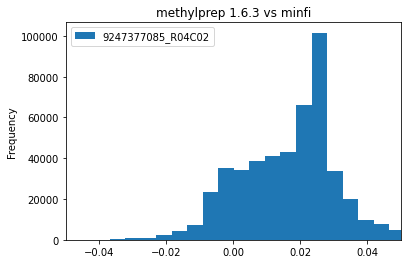

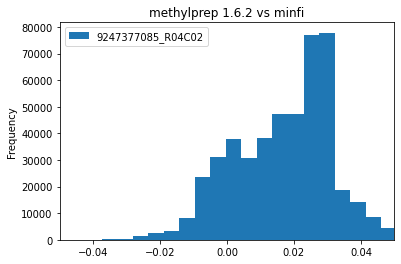

In [8]:
(meth-minfi).plot.hist(bins=300, xlim=(-0.05, 0.05), title="methylprep 1.6.3 vs minfi")
(meth162-minfi).plot.hist(bins=300, xlim=(-0.05, 0.05), title="methylprep 1.6.2 vs minfi")
print((meth-minfi).mean(), (meth-minfi).min(), (meth-minfi).max())
print((meth162-minfi).mean(), (meth162-minfi).min(), (meth162-minfi).max())